In [ ]:
import numpy as np
from IPython.display import Audio

# Define audio parameters
frequency = 440 # Hz (A4 note)
sample_rate = 44100  # samples per second
duration = 10    # seconds

# Generate time values
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the sine wave
sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t)

# Play the audio
Audio(sine_wave, rate=sample_rate)

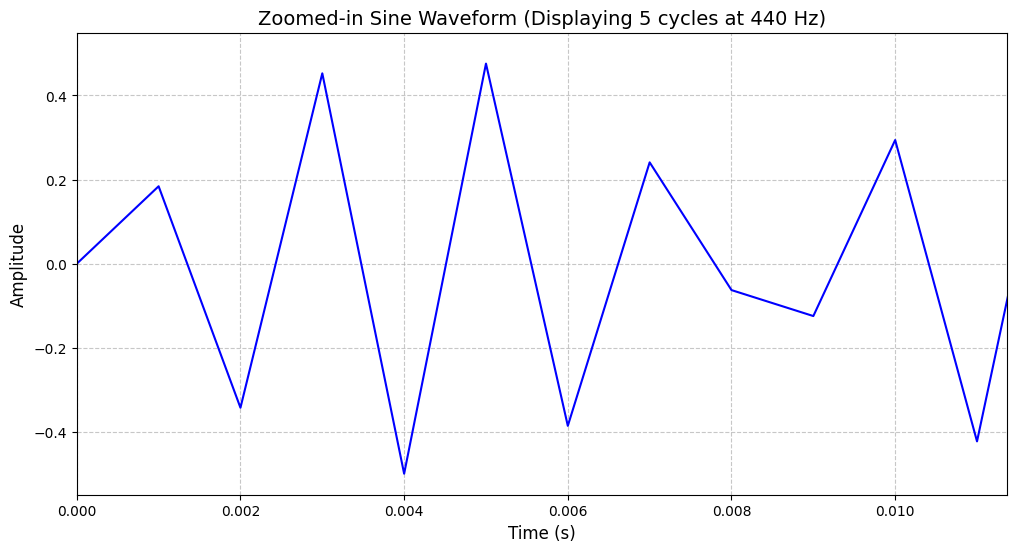

In [5]:
import matplotlib.pyplot as plt

# 'frequency', 't', and 'sine_wave' are expected to be available from previous cells.

# Calculate xlim dynamically to show 5 cycles for clearer interpretation
# Assuming 'frequency' is defined in a preceding cell (e.g., 440 Hz)
cycle_duration = 1 / frequency
x_limit_end = 5 * cycle_duration # Display 5 full cycles

plt.figure(figsize=(12, 6)) # Increased figure size for better visibility
plt.plot(t, sine_wave, color='blue', linewidth=1.5) # Added color and slightly increased linewidth
plt.title(f'Zoomed-in Sine Waveform (Displaying 5 cycles at {frequency} Hz)', fontsize=14) # More descriptive title
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.xlim(0, x_limit_end) # Dynamically set x-axis limit
plt.grid(True, linestyle='--', alpha=0.7) # Improved grid style for clarity
plt.show()

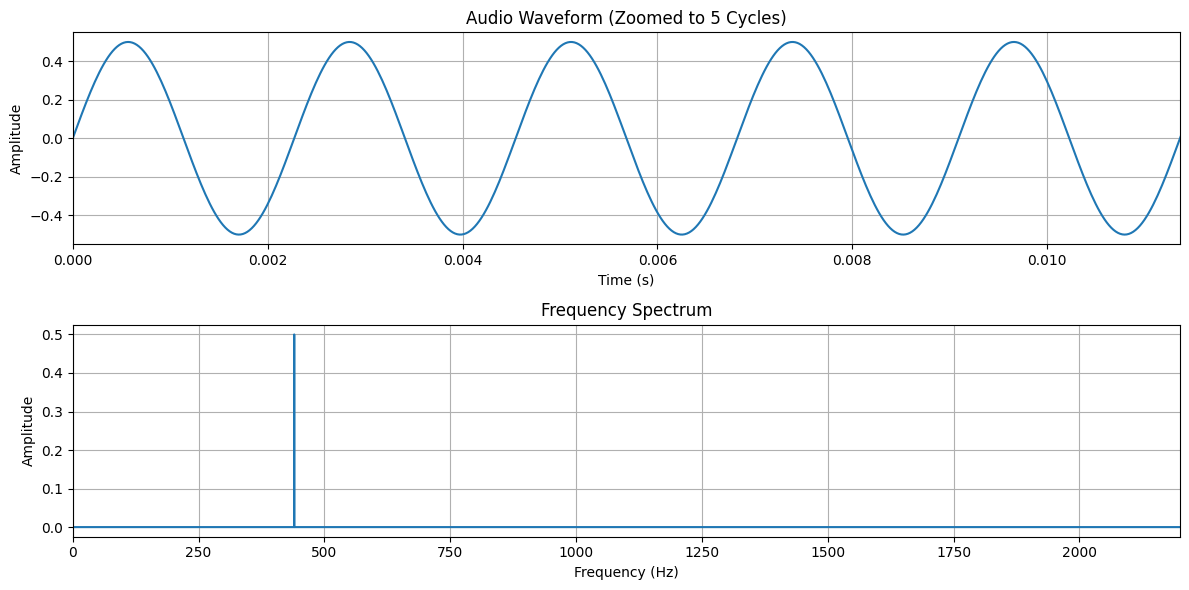

In [3]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np

# Define audio parameters
frequency = 440 # Hz (A4 note) - assuming the same frequency as initial setup
sample_rate = 44100   # Increased samples per second for smoother waveform
duration = 10    # seconds - assuming the same duration as initial setup

# Generate time values
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the sine wave
sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave)
plt.title('Audio Waveform (Zoomed to 5 Cycles)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Calculate xlim dynamically to show 5 cycles for clearer interpretation
cycle_duration = 1 / frequency
x_limit_end = 5 * cycle_duration # Display 5 full cycles
plt.xlim(0, x_limit_end) # Dynamically set x-axis limit to show a few cycles

N = len(sine_wave)
T_sample = 1.0 / sample_rate

# Removed plt.xticks to allow matplotlib to automatically determine appropriate ticks

# FFT
yf = fft(sine_wave)
xf = fftfreq(N, 1/sample_rate)[:N//2]

plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, frequency * 5) # Keep original xlim for frequency spectrum
plt.grid(True)

plt.tight_layout()
plt.show()

### Quantization

Quantization is the process of mapping continuous amplitude values to a finite set of discrete values. We'll simulate this by reducing the number of bits used to represent each sample. Less bits mean fewer amplitude levels and more 'stair-stepping' in the waveform, which can introduce quantization noise.

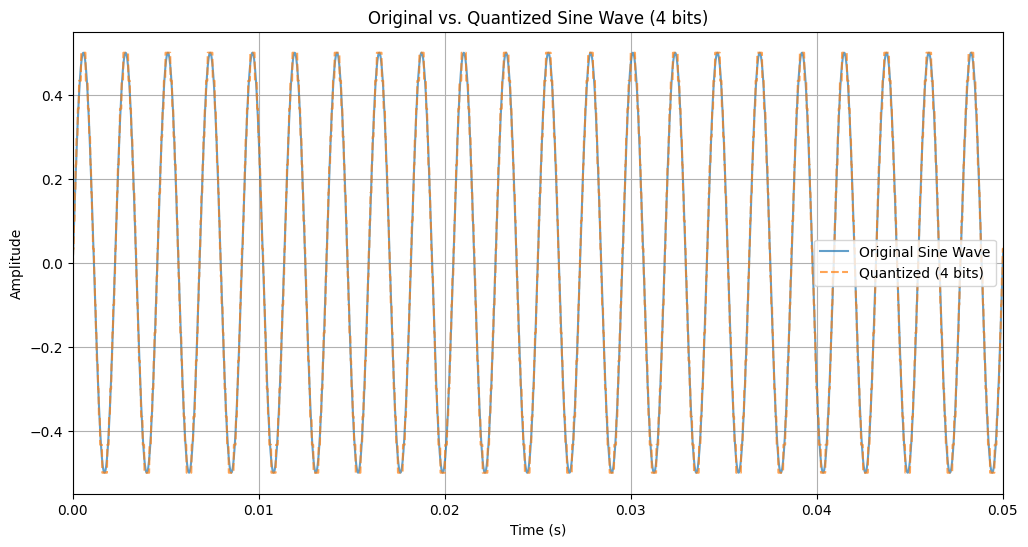

In [ ]:
import matplotlib.pyplot as plt

# Define the number of bits for quantization
bits = 4  # You can change this to 2, 8, 16, etc., to see the effect

# Calculate the number of quantization levels
levels = 2**bits

# Quantize the sine wave
# 1. Scale the waveform to a positive range (e.g., 0 to 1)
scaled_wave = (sine_wave - sine_wave.min()) / (sine_wave.max() - sine_wave.min())

# 2. Scale to the number of levels, round, and scale back
quantized_wave = np.round(scaled_wave * (levels - 1)) / (levels - 1)

# 3. Scale back to the original amplitude range
quantized_wave = quantized_wave * (sine_wave.max() - sine_wave.min()) + sine_wave.min()

# Plot the original and quantized waveforms for comparison (zoomed in)
plt.figure(figsize=(12, 6))
plt.plot(t, sine_wave, label='Original Sine Wave', alpha=0.7)
plt.plot(t, quantized_wave, label=f'Quantized ({bits} bits)', linestyle='--', alpha=0.7)
plt.title(f'Original vs. Quantized Sine Wave ({bits} bits)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05) # Zoom in to see quantization steps
plt.grid(True)
plt.legend()
plt.show()

### Play Quantized Audio

Now, let's listen to the quantized version of the sine wave.

In [ ]:
from IPython.display import Audio

Audio(quantized_wave, rate=sample_rate)